Projeto Final do Módulo de Estatística

<font color='cyan'>@author:</font> João Francisco Baiochi

---  

### Importação e Configuração

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import norm, t as t_student 
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

# show all columns when displayed
pd.set_option('display.max_columns', None)

# define colors
colors = {
    'cyan': '#1696d2',
    'gray': '#5c5859',
    'black': '#000000',
    'yellow': '#fdbf11',
    'orange': '#ca5800',
    'magenta': '#af1f6b',
    'green': '#408941',
    'red': '#a4201d',
    'seablue': '#062635',
    'lightblue': '#46abdb'
}

color_palette = ['#1696d2', '#5c5859', '#fdbf11', '#af1f6b', '#ca5800', '#408941', '#a4201d', '#062635', '#46abdb']
sns.set()
sns.set_palette(color_palette)

# terminal colors
WHITE = '\033[39m'
CYAN = '\033[36m'
GREEN = '\033[32m'
RED = '\033[31m'

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Statsmodels.api: {sm.__version__}')

Numpy: 1.20.3
Pandas: 1.3.4
Seaborn: 0.11.2
Statsmodels.api: 0.12.2


### Funções Complementares

#### Remover outliers

In [2]:
# Get Inferior/Superior limit of outliers
def get_outlier_limit(array: pd.Series) -> float:

    q1, q3 = array.quantile(0.25), array.quantile(0.75)
    iqr = q3 - q1
    inf_limit = q1 - 1.5*iqr
    sup_limit = q3 + 1.5*iqr

    return inf_limit, sup_limit

#  Remove outliers from a Series
def remove_outliers(df: pd.Series) -> pd.Series:

    inf_limit, sup_limit = get_outlier_limit(df)
    
    df = df[(df > inf_limit) & (df < sup_limit)]

    return df

# Remove outliers from Data Frame
def remove_outliers_df(df: pd.DataFrame, columns: list) -> pd.DataFrame:

    if isinstance(columns, str):
        columns = [columns]

    for column in columns:
        inf, sup = get_outlier_limit(df[column])
        # Filter only rows inside the limit range (exclude outliers)
        df = df[(df[column] > inf) & (df[column] < sup)]
        
    return df

#### Criar Modelo de Regressão Linear

In [84]:
# Create LinearRegression andSM Model
def create_model(df: pd.DataFrame, target: str, log=True, plot=True) -> dict():

    if target not in df.columns:
        print('Error: Target is not in the model data frame.')
        return None

    # Set features
    X = df.drop(target, axis=1)
    # Set targets
    y = df[target]
    # Split train/test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    # Create linear regression and fit model
    rgs = LinearRegression().fit(X_train, y_train)
    # Get predicted values
    y_predict = rgs.predict(X_test)
    # Calculate residuals
    residuals = y_test - y_predict

    # model with StatsModels library
    x = sm.add_constant(X_train)
    model = sm.OLS(y_train, x).fit()

    # Print summary
    if log:
        print(f'{CYAN}Regression model score: {round(rgs.score(X_train, y_train) *100,2)} %{WHITE}')
        print(f'Regression model r²score: {round(r2_score(y_test, y_predict) *100,2)} %')
        print(f'{CYAN}Residuals mean: {model.resid.mean()}{WHITE}')
        normal_test = normaltest(model.resid)
        print(f'Normal distribuition test:\nstatistic = {round(normal_test[0],2)}; pvalue = {normal_test[1]}')

        print(f'{CYAN}Absolute Mean Error: {mean_absolute_error(y_test, y_predict)}{WHITE}')
        print(f'Mean Squared Error: {mean_squared_error(y_test, y_predict)}')
        if (y_predict < 0).any():
            print("Couldn't calculate Mean Squared Log Error, there are negative values on y_pred")
        else:
            print(f'{CYAN}Mean Squared Log Error: {mean_squared_log_error(y_test, y_predict)}{WHITE}')
        
        print(f'\n{GREEN}Features with p-value > 0.05:{WHITE}\n{model.pvalues[model.pvalues > 0.05].sort_values(ascending=False)}')

    if plot:
        fig, axes = plt.subplots(1,3,figsize=(22,6))

        # resids dispersion
        sns.scatterplot(x=y, y=model.resid, ax=axes[0])
        axes[0].set_title('Residual Dispersion', fontsize=18)
        axes[0].set_xlabel('True value')
        axes[0].set_ylabel('Residual value')

        # resids distribuition
        sns.histplot(model.resid, kde=True, ax=axes[1], color=colors['gray'])
        axes[1].set_title('Residual Distribuition', fontsize=18)

        # true vs predict correlation
        sns.regplot(x = df[target], 
                    y = rgs.predict(df[X_train.columns]), 
                    scatter_kws={'alpha':0.5}, line_kws={'color':colors['gray']}, ax=axes[2], color=colors['yellow'])
        axes[2].set_title('Model Performance', fontsize=18)
        axes[2].set_xlabel('True Value')
        axes[2].set_ylabel('Predicted value');

    return {
        'LR_Model': rgs,
        'SM_model': model,
        'residuals' : residuals
    }

# Descrição do Projeto

A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país.  
A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas.   
Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.

Clique <a href='https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv'>aqui</a> para baixar o dataset.

# Visualização do Dataset

In [4]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [5]:
# renaming columns for easy accession
df.columns = df.columns.str.replace(' ', '_')   # replace space with underscore
df.columns = df.columns.str.replace(',', '')    # remove commas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Total_Household_Income                        41544 non-null  int64 
 1   Region                                        41544 non-null  object
 2   Total_Food_Expenditure                        41544 non-null  int64 
 3   Main_Source_of_Income                         41544 non-null  object
 4   Agricultural_Household_indicator              41544 non-null  int64 
 5   Bread_and_Cereals_Expenditure                 41544 non-null  int64 
 6   Total_Rice_Expenditure                        41544 non-null  int64 
 7   Meat_Expenditure                              41544 non-null  int64 
 8   Total_Fish_and__marine_products_Expenditure   41544 non-null  int64 
 9   Fruit_Expenditure                             41544 non-null  int64 
 10

In [7]:
null_values = df.isnull().sum()
null_values[null_values > 0]

Household_Head_Occupation         7536
Household_Head_Class_of_Worker    7536
dtype: int64

# <font color=Gold>Milestone 1

## <font color='orange'>Tarefa 1</font>
Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.  

In [8]:
max_error = 500
conf_level = 0.95
sig_level = 1 - conf_level

In [9]:
sigma = df['Medical_Care_Expenditure'].std()
z_alpha_2 = norm.ppf(0.95 + (0.05 / 2))
z_alpha_2

1.959963984540054

In [10]:
n_min = (z_alpha_2 * sigma / max_error)**2

In [11]:
n = round(np.ceil(n_min))
n

11121

In [12]:
population_mean = df['Medical_Care_Expenditure'].mean()
sample_error = [[n,abs(df['Medical_Care_Expenditure'].sample(n, random_state=101).mean() - population_mean) ] for n in range (2, df.shape[0]+1) ]

In [13]:
n_error = pd.DataFrame(sample_error, columns=['n', 'error'])
n_error.head()

,n,error
0,2,6334.730936
1,3,5517.564269
2,4,4882.730936
3,5,5262.230936
4,6,5495.564269


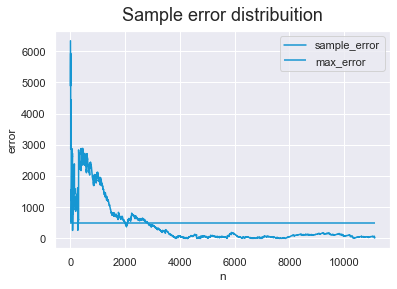

In [14]:
plt.figure(figsize=(6,4))
sns.lineplot(data=n_error.iloc[:n], x='n', y='error', label='sample_error')
plt.hlines(y=500, xmin=0, xmax=n, label='max_error')
plt.legend()
plt.title('Sample error distribuition', fontsize=18, pad=10);

In [15]:
print(f'Tamanho mínimo da amostra para nível de confiança 95% e erro máximo 500: {n}')

Tamanho mínimo da amostra para nível de confiança 95% e erro máximo 500: 11121


## <font color='orange'>Tarefa 2</font>
Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.  

In [16]:
sample_df = df.sample(n, random_state=101)
sample_df.shape


(11121, 60)

In [17]:
quantitative_features = sample_df.select_dtypes(include=['int64']).iloc[:,:10].columns.values
quantitative_features

array(['Total_Household_Income', 'Total_Food_Expenditure',
       'Agricultural_Household_indicator',
       'Bread_and_Cereals_Expenditure', 'Total_Rice_Expenditure',
       'Meat_Expenditure', 'Total_Fish_and__marine_products_Expenditure',
       'Fruit_Expenditure', 'Vegetables_Expenditure',
       'Restaurant_and_hotels_Expenditure'], dtype=object)

In [18]:
sample_df['Agricultural_Household_indicator'].value_counts()

0    7532
1    2372
2    1217
Name: Agricultural_Household_indicator, dtype: int64

A variável **Agricultural Household indicator** apresenta uma característica de variável qualitativa, portanto iremos substituir por outra

In [19]:
sample_df.select_dtypes(include=['int64']).iloc[:,10].head(3)

1849     880
29179      0
20513    432
Name: Alcoholic_Beverages_Expenditure, dtype: int64

In [20]:
quantitative_features[2] = 'Alcoholic_Beverages_Expenditure'

In [21]:
sample_df[quantitative_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Household_Income,11121.0,248771.872763,283928.225230,12141.0,104895.0,163360.0,292496.0,6452314.0
Total_Food_Expenditure,11121.0,85369.309594,52122.343632,5408.0,50856.0,73157.0,105683.0,691917.0
Alcoholic_Beverages_Expenditure,11121.0,1075.270839,2088.708776,0.0,0.0,270.0,1300.0,38220.0
Bread_and_Cereals_Expenditure,11121.0,25176.049636,13829.135190,0.0,16512.0,23377.0,31358.0,437467.0
Total_Rice_Expenditure,11121.0,18205.065552,12163.718364,0.0,10990.0,16559.0,23840.0,429640.0
Meat_Expenditure,11121.0,10558.656596,10428.335568,0.0,3324.0,7290.0,14420.0,132142.0
Total_Fish_and__marine_products_Expenditure,11121.0,10464.498067,7774.138424,0.0,5470.0,8643.0,13370.0,119640.0
Fruit_Expenditure,11121.0,2542.589066,2657.768725,0.0,1010.0,1835.0,3115.0,69319.0
Vegetables_Expenditure,11121.0,4981.193598,3289.452735,0.0,2850.0,4298.0,6252.0,49810.0
Restaurant_and_hotels_Expenditure,11121.0,15662.865929,23823.800049,0.0,1900.0,7340.0,19960.0,597150.0


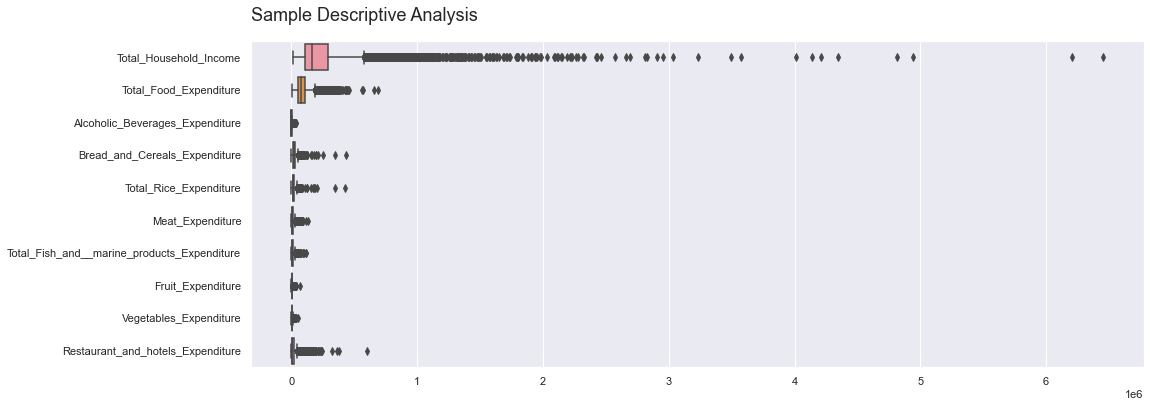

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(data = sample_df[quantitative_features], orient='h')
plt.title('Sample Descriptive Analysis', fontsize=18, pad=20, loc='left');

Podemos observar que as amostras possuem um alto nível de outliers, faremos a mesma análise retirando estes dados

In [23]:
iqr = sample_df[quantitative_features].quantile(0.75) - sample_df[quantitative_features].quantile(0.25)
iqr

Total_Household_Income                         187601.0
Total_Food_Expenditure                          54827.0
Alcoholic_Beverages_Expenditure                  1300.0
Bread_and_Cereals_Expenditure                   14846.0
Total_Rice_Expenditure                          12850.0
Meat_Expenditure                                11096.0
Total_Fish_and__marine_products_Expenditure      7900.0
Fruit_Expenditure                                2105.0
Vegetables_Expenditure                           3402.0
Restaurant_and_hotels_Expenditure               18060.0
dtype: float64

In [24]:
iqr.Total_Household_Income

187601.0

In [25]:
df.query(f'Total_Household_Income > {iqr.Total_Household_Income}')

,Total_Household_Income,Region,Total_Food_Expenditure,Main_Source_of_Income,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,Vegetables_Expenditure,Restaurant_and_hotels_Expenditure,Alcoholic_Beverages_Expenditure,Tobacco_Expenditure,Clothing_Footwear_and_Other_Wear_Expenditure,Housing_and_water_Expenditure,Imputed_House_Rental_Value,Medical_Care_Expenditure,Transportation_Expenditure,Communication_Expenditure,Education_Expenditure,Miscellaneous_Goods_and_Services_Expenditure,Special_Occasions_Expenditure,Crop_Farming_and_Gardening_expenses,Total_Income_from_Entrepreneurial_Acitivites,Household_Head_Sex,Household_Head_Age,Household_Head_Marital_Status,Household_Head_Highest_Grade_Completed,Household_Head_Job_or_Business_Indicator,Household_Head_Occupation,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_year_old,Members_with_age_5_-_17_years_old,Total_number_of_family_members_employed,Type_of_Building/House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Electricity,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD/VCD/DVD,Number_of_Component/Stereo_set,Number_of_Refrigerator/Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,Number_of_Car_Jeep_Van,Number_of_Landline/wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven/Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,54,16,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,0,0,1,0,0,0,0,3,0,0,0,1
6,198621,CAR,104644,Wage/Salaries,0,40992,36312,12968,12310,2565,15620,6200,1920,0,7930,24126,12000,340,12696,1848,0,6126,6400,72290,72290,Male,45,Married,Third Year High School,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Extended Family,5,1,0,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,35,18,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,0,1,0,0,0,0,0,2,0,0,0,1
9,625753,CAR,158721,Enterpreneurial Activities,0,56003,43239,26488,25678,3880,11360,15620,0,0,7740,65730,27000,1786,5160,7200,13180,15210,4000,0,312974,Male,53,Married,High School Graduate,With Job/Business,Hog raisi

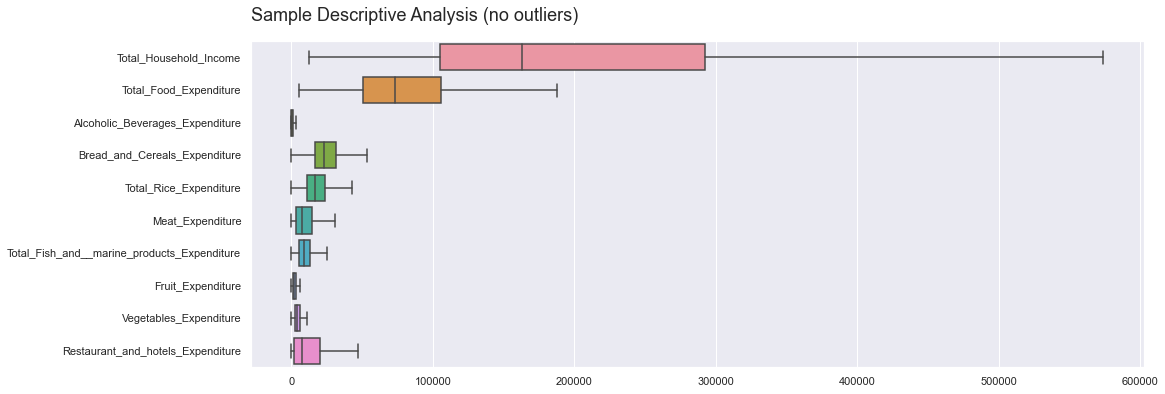

In [26]:
plt.figure(figsize=(16,6))
sns.boxplot(data = sample_df[quantitative_features], orient='h', showfliers=False)
plt.title('Sample Descriptive Analysis (no outliers)', fontsize=18, pad=20, loc='left');

# <font color=Gold>Milestone 2

## <font color='orange'>Tarefa 1</font>
Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).  

In [27]:
df[['Medical_Care_Expenditure','Education_Expenditure']].describe().T

,count,mean,std,min,25%,50%,75%,max
Medical_Care_Expenditure,41544.0,7160.230936,26902.002275,0.0,300.0,1125.0,4680.0,1049275.0
Education_Expenditure,41544.0,7473.500481,21219.170907,0.0,0.0,880.0,4060.0,731000.0


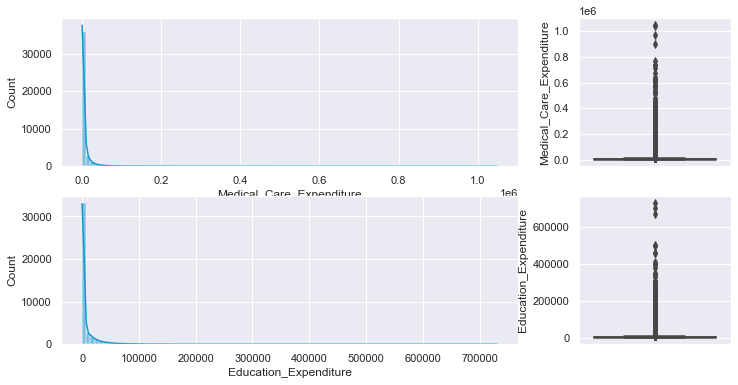

In [28]:
fig, axes = plt.subplots(2,2, figsize=(12,6), gridspec_kw={'width_ratios': [3, 1]})

sns.histplot(df.Medical_Care_Expenditure, bins=100, kde=True, ax=axes[0,0])
sns.histplot(df.Education_Expenditure, bins=100, kde=True, ax=axes[1,0])
sns.boxplot(y=df.Medical_Care_Expenditure, ax=axes[0,1])
sns.boxplot(y=df.Education_Expenditure, ax=axes[1,1]);

In [29]:
bp = plt.boxplot(df['Medical_Care_Expenditure'])
mce_outliers = [item.get_ydata() for item in bp["fliers"]][0]
bp = plt.boxplot(df['Education_Expenditure'])
ee_outliers = [item.get_ydata() for item in bp["fliers"]][0]
plt.close()

print(f'Porcentagem que representa os outliers de Medical_Care_Expenditure:\
 {round(mce_outliers.size / df.Medical_Care_Expenditure.shape[0] * 100, 2)} %')
print(f'Porcentagem que representa os outliers de Education_Expenditure:\
 {round(ee_outliers.size / df.Education_Expenditure.shape[0] * 100, 2)} %')

Porcentagem que representa os outliers de Medical_Care_Expenditure: 13.03 %
Porcentagem que representa os outliers de Education_Expenditure: 17.37 %


Ambas features possuem um alto nível de outliers, iremos remover junto com valores = 0 para seguir com a análise

In [30]:
mce = remove_outliers(df.Medical_Care_Expenditure[df.Medical_Care_Expenditure>0])
ee = remove_outliers(df.Education_Expenditure[df.Education_Expenditure>0])

# alternative
# df.Medical_Care_Expenditure[~df.Medical_Care_Expenditure.isin(mce_outliers)]

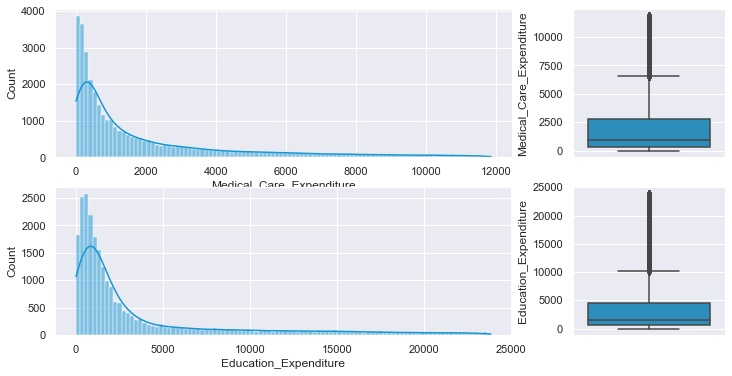

In [31]:
fig, axes = plt.subplots(2,2, figsize=(12,6), gridspec_kw={'width_ratios': [3, 1]})

sns.histplot(mce, bins=100, kde=True, ax=axes[0,0])
sns.histplot(ee, bins=100, kde=True, ax=axes[1,0])
sns.boxplot(y=mce, ax=axes[0,1])
sns.boxplot(y=ee, ax=axes[1,1]);

In [32]:
def calculate_ci(data, n=30, conf_level=0.95):
    
    sigma = data.std() #desvio padrão populacional
    sig_level = 1 - conf_level
    z_alpha_2 = norm.ppf(conf_level + (sig_level / 2))
    error = z_alpha_2 * (sigma / np.sqrt(n))
    sample_mean = data.sample(n, random_state=101).mean()

    a, b = norm.interval(conf_level, loc=sample_mean, scale=sigma / np.sqrt(n))

    print(f'Média Amostral: {round(sample_mean,2)}; Erro: {round(error,2)}')
    print(f'Intervalo de confiança {int(conf_level*100)}% para {data.name}\n({round(a,2)} , {round(b,2)})')

In [33]:
calculate_ci(df.Medical_Care_Expenditure)
print('Cálculo sem outliers:')
calculate_ci(mce)

Média Amostral: 6644.1; Erro: 9626.58
Intervalo de confiança 95% para Medical_Care_Expenditure
(-2982.48 , 16270.68)
Cálculo sem outliers:
Média Amostral: 1991.93; Erro: 937.64
Intervalo de confiança 95% para Medical_Care_Expenditure
(1054.29 , 2929.57)


In [34]:
calculate_ci(df.Education_Expenditure)
print('Cálculo sem outliers:')
calculate_ci(ee)

Média Amostral: 5634.47; Erro: 7593.04
Intervalo de confiança 95% para Education_Expenditure
(-1958.58 , 13227.51)
Cálculo sem outliers:
Média Amostral: 4334.6; Erro: 1956.35
Intervalo de confiança 95% para Education_Expenditure
(2378.25 , 6290.95)


## <font color='orange'>Tarefa 2</font>
Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.  

In [35]:
df.groupby('Household_Head_Sex')['Total_Number_of_Family_members'].describe().T

Household_Head_Sex,Female,Male
count,9061.000000,32483.000000
mean,3.864916,4.850045
std,2.240325,2.244633
min,1.000000,1.000000
25%,2.000000,3.000000
50%,4.000000,5.000000
75%,5.000000,6.000000
max,20.000000,26.000000


### Formulação do Teste de Hipótese:

$\mu_1$ : média do número total de membros da família por chefe do sexo masculino  
$\mu_1$ : média do número total de membros da família por chefe do sexo feminino  

$H_0: \mu_1 - \mu_2  \geq 0$

$H_1: \mu_1 - \mu_2 < 0$


### Selecionando a amostra

In [36]:
# amostra = 1% dos dados
n = round(df.shape[0] * 0.01)
male_householder = df.query('Household_Head_Sex == "Male"')['Total_Number_of_Family_members'].sample(n)
female_householder = df.query('Household_Head_Sex == "Female"')['Total_Number_of_Family_members'].sample(n)

### Calculando o valor Z

In [37]:
D0 = 0
alpha = 0.05
conf_level = 1 - alpha
# numero da amostra
n1 = len(male_householder)
n2 = len(female_householder)

# media amostral
x1 = male_householder.mean()
x2 = female_householder.mean()

# desvio padrão amostral
sigma1 = male_householder.std()
sigma2 = female_householder.std()

# calculo do test Z
numerador = (x1 - x2) - D0
denominador = np.sqrt((sigma1 **2 / n1) + (sigma2**2 / n2))
z = numerador / denominador
print(f'Valor crítico z = {z}')
z_alpha = norm.ppf(conf_level)
print(f'Valor z_alpha para confiança 95% = {z_alpha}')
p_value = norm.sf(z)
print(f'P_value = {p_value}')

Valor crítico z = 4.994603407063611
Valor z_alpha para confiança 95% = 1.6448536269514722
P_value = 2.9478397749672386e-07


In [38]:
male_test = DescrStatsW(male_householder)
female_test = DescrStatsW(female_householder)
test = CompareMeans(male_test, female_test)
test.ztest_ind(alternative='larger', value=D0)

(4.994603407063608, 2.947839774967276e-07)

### <font color='DodgerBlue'>Conclusão</font>  

Rejeitar $H_0$ se $z \geq z_{\alpha}$  
Rejeitar $H_0$ se o valor $p\leq\alpha$  

In [39]:
print(f'Z > Z_alpha : {z >= z_alpha}') 
print(f'P_value < Alpha: {p_value <= alpha}') 

Z > Z_alpha : True
P_value < Alpha: True


<font size=4>Conforme os testes realizados, rejeitamos $H_0$ e concluimos que há uma diferença entre a média de número total de membros da família pelo sexo do chefe de família.</font>

## <font color='orange'>Tarefa 3</font>
Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).  

*Considere “Enteroreneurial activities” e “other sources of income” como "outros".*

### Tratando os dados

In [40]:
df[['Total_Household_Income','Main_Source_of_Income']]

,Total_Household_Income,Main_Source_of_Income
0,480332,Wage/Salaries
1,198235,Wage/Salaries
2,82785,Wage/Salaries
3,107589,Wage/Salaries
4,189322,Wage/Salaries
...,...,...
41539,119773,Enterpreneurial Activities
41540,137320,Enterpreneurial Activities
41541,133171,Enterpreneurial Activities
41542,129500,Enterpreneurial Activities


In [41]:
income = df[['Total_Household_Income','Main_Source_of_Income']].copy()
income['Main_Source_of_Income'].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main_Source_of_Income, dtype: int64

In [42]:
income.replace({
    'Other sources of Income': 'Others',
    'Enterpreneurial Activities': 'Others'
}, inplace=True)
income['Main_Source_of_Income'].value_counts()

Others           21156
Wage/Salaries    20388
Name: Main_Source_of_Income, dtype: int64

In [43]:
income.groupby('Main_Source_of_Income')['Total_Household_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Main_Source_of_Income,,,,,,,,
Others,21156.0,228417.147476,315347.438379,11285.0,93166.0,144612.0,256270.25,11815988.0
Wage/Salaries,20388.0,267414.952080,252468.952984,18004.0,120047.0,185386.0,325645.50,6071030.0


### Formulação do Teste de Hipótese

$\mu_1$ : média do número total da renda da familia pela fonte salarial **Wage/Salaries**  
$\mu_1$ : média do número total da renda da familia pela fonte salarial **Others**  

$H_0: \mu_1 - \mu_2  = 0$

$H_1: \mu_1 - \mu_2 \neq 0$


### Selecionando a amostra

In [44]:
# amostra = 1% dos dados
n = round(income.shape[0] * 0.01)
salaries = income.query('Main_Source_of_Income == "Wage/Salaries"')['Total_Household_Income'].sample(n)
others = income.query('Main_Source_of_Income == "Others"')['Total_Household_Income'].sample(n)

### Calculando o valor T

In [45]:
D0 = 0
# significancia
alpha = 0.05
# confiança
beta = 1 - alpha
# numero da amostra
n1 = len(salaries)
n2 = len(others)

# media amostral
x1 = salaries.mean()
x2 = others.mean()

# desvio padrão amostral
sigma1 = salaries.std()
sigma2 = others.std()

# calculo do test T
numerador = (x1 - x2) - D0
denominador = np.sqrt((sigma1 **2 / n1) + (sigma2**2 / n2))
t = numerador / denominador
print(f'Valor crítico t = {t}')
gl = n1 + n2 - 2
t_alpha = t_student.ppf(beta + alpha/2, df=gl)
print(f'Valor t_alpha para confiança 95% = {t_alpha}')
p_value = norm.sf(t)
print(f'P_value = {p_value*2}')

Valor crítico t = 2.4145743751844297
Valor t_alpha para confiança 95% = 1.9628331678442097
P_value = 0.015753606334993918


In [46]:
salaries_test = DescrStatsW(salaries)
others_test = DescrStatsW(others)
test = CompareMeans(salaries_test, others_test)
test.ztest_ind(alternative='two-sided', value=D0)

(2.4145743751844297, 0.015753606334993918)

### <font color='DodgerBlue'>Conclusão</font>  

Rejeitar $H_0$ se $t \geq t_{\alpha}$  
Rejeitar $H_0$ se o valor $p\leq\alpha$  

In [47]:
print(f'T > t_alpha : {t >= t_alpha}') 
print(f'P_value < alpha: {p_value <= alpha}') 

T > t_alpha : True
P_value < alpha: True


<font size=4>Conforme os testes realizados, aceitamos $H_0$ e concluimos que não há uma diferença de média total de renda da família de acordo com a fonte salarial.</font>

# <font color=Gold>Milestone 3

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.  

### <font color='orange'>Análisa Exploratória</font>

<font size=4, color='lightgreen'>Discussão</font>  

Durante a coleta de informações a pesquisa, precisamos levar em conta que dados não foram fornecidos corretamente, ou omitidos. Algumas features estarem incompletas podem atrapalhar a criação do nosso modelo de predição, por exemplo possuir uma alta renda sem ter bens móveis e vice-versa.  
Os dados serão analisados para tentar cobrir essas possíveis inconscistências.

#### Verificando os tipos dos dados

In [48]:
df.dtypes.value_counts()

int64     45
object    15
dtype: int64

In [49]:
df.select_dtypes(include=['object']).nunique()

Region                                       17
Main_Source_of_Income                         3
Household_Head_Sex                            2
Household_Head_Marital_Status                 6
Household_Head_Highest_Grade_Completed       46
Household_Head_Job_or_Business_Indicator      2
Household_Head_Occupation                   378
Household_Head_Class_of_Worker                7
Type_of_Household                             3
Type_of_Building/House                        6
Type_of_Roof                                  7
Type_of_Walls                                 6
Tenure_Status                                 8
Toilet_Facilities                             8
Main_Source_of_Water_Supply                  11
dtype: int64

In [50]:
"""# create mapper dict to convert object into category type
mapper = {key:'category' for key in df.select_dtypes(include=['object']).columns}
df = df.astype(mapper)
df.describe(include=['category']).T"""
df.describe(include=['object']).T

,count,unique,top,freq
Region,41544,17,IVA - CALABARZON,4162
Main_Source_of_Income,41544,3,Wage/Salaries,20388
Household_Head_Sex,41544,2,Male,32483
Household_Head_Marital_Status,41544,6,Married,31347
Household_Head_Highest_Grade_Completed,41544,46,High School Graduate,9628
Household_Head_Job_or_Business_Indicator,41544,2,With Job/Business,34008
Household_Head_Occupation,34008,378,Farmhands and laborers,3478
Household_Head_Class_of_Worker,34008,7,Self-employed wihout any employee,13766
Type_of_Household,41544,3,Single Family,28445
Type_of_Building/House,41544,6,Single house,39069


#### Verificando os valores nulos

In [51]:
null_values = df.isnull().sum()
null_values[null_values > 0]

Household_Head_Occupation         7536
Household_Head_Class_of_Worker    7536
dtype: int64

In [52]:
print('Porcentagem de NaNs para Household_Head_Occupation:',
      f'{100 - round(df.Household_Head_Occupation.count() / df.shape[0]*100, 2)} %')
print('Porcentagem de NaNs para Household_Head_Class_of_Worker:',
      f'{100 - round(df.Household_Head_Class_of_Worker.count() / df.shape[0]*100, 2)} %')

Porcentagem de NaNs para Household_Head_Occupation: 18.14 %
Porcentagem de NaNs para Household_Head_Class_of_Worker: 18.14 %


In [53]:
df[['Household_Head_Occupation','Household_Head_Class_of_Worker']].head()

,Household_Head_Occupation,Household_Head_Class_of_Worker
0,General elementary education teaching professi...,Worked for government/government corporation
1,Transport conductors,Worked for private establishment
2,Farmhands and laborers,Worked for private establishment
3,Rice farmers,Employer in own family-operated farm or business
4,General managers/managing proprietors in trans...,Self-employed wihout any employee


In [54]:
print(f'Number of categories in Household_Head_Occupation: {df.Household_Head_Occupation.value_counts().size}')
print(f'Number of categories in Household_Head_Class_of_Worker: {df.Household_Head_Class_of_Worker.value_counts().size}')

Number of categories in Household_Head_Occupation: 378
Number of categories in Household_Head_Class_of_Worker: 7


In [55]:
df.Household_Head_Class_of_Worker.value_counts()

Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: Household_Head_Class_of_Worker, dtype: int64

In [56]:
df[df.Household_Head_Occupation.isna()][['Total_Household_Income', 'Main_Source_of_Income']]

,Total_Household_Income,Main_Source_of_Income
8,171152,Other sources of Income
13,128214,Enterpreneurial Activities
14,91525,Other sources of Income
15,171742,Other sources of Income
26,84330,Other sources of Income
...,...,...
41520,695292,Wage/Salaries
41529,95500,Wage/Salaries
41533,153500,Other sources of Income
41535,166600,Other sources of Income


A partir desta análise podemos obersvar que os dados nulos provávelmente se tratam de um dado não informado, descartamos a possibilidade de ser *desempregado* pois há rendimento declarado. Portando iremos substituir os valores *NaN* por "Not Specified"

In [57]:
df.Household_Head_Occupation.fillna('Not Specified',inplace=True)
df.Household_Head_Class_of_Worker.fillna('Not Specified',inplace=True)

#### Análise descritiva

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Household_Income,41544.0,247555.584802,286880.522653,11285.0,104895.00,164079.5,291138.50,11815988.0
Total_Food_Expenditure,41544.0,85099.158194,51637.947682,2947.0,51017.25,72985.5,105635.50,827565.0
Agricultural_Household_indicator,41544.0,0.429858,0.676666,0.0,0.00,0.0,1.00,2.0
Bread_and_Cereals_Expenditure,41544.0,25133.723642,13466.482984,0.0,16556.00,23324.0,31439.00,765864.0
Total_Rice_Expenditure,41544.0,18195.825005,11727.224350,0.0,11020.00,16620.0,23920.00,758326.0
Meat_Expenditure,41544.0,10540.072574,10497.727757,0.0,3353.75,7332.5,14292.00,261566.0
Total_Fish_and__marine_products_Expenditure,41544.0,10529.318337,7812.201613,0.0,5504.00,8695.0,13388.00,188208.0
Fruit_Expenditure,41544.0,2550.474990,2969.752879,0.0,1024.75,1820.0,3100.00,273769.0
Vegetables_Expenditure,41544.0,5006.918568,3300.175236,0.0,2873.00,4314.0,6304.25,74800.0
Restaurant_and_hotels_Expenditure,41544.0,15436.566075,23705.195929,0.0,1930.00,7314.0,19921.25,725296.0


#### Correlação dos Dados

##### Heatmap

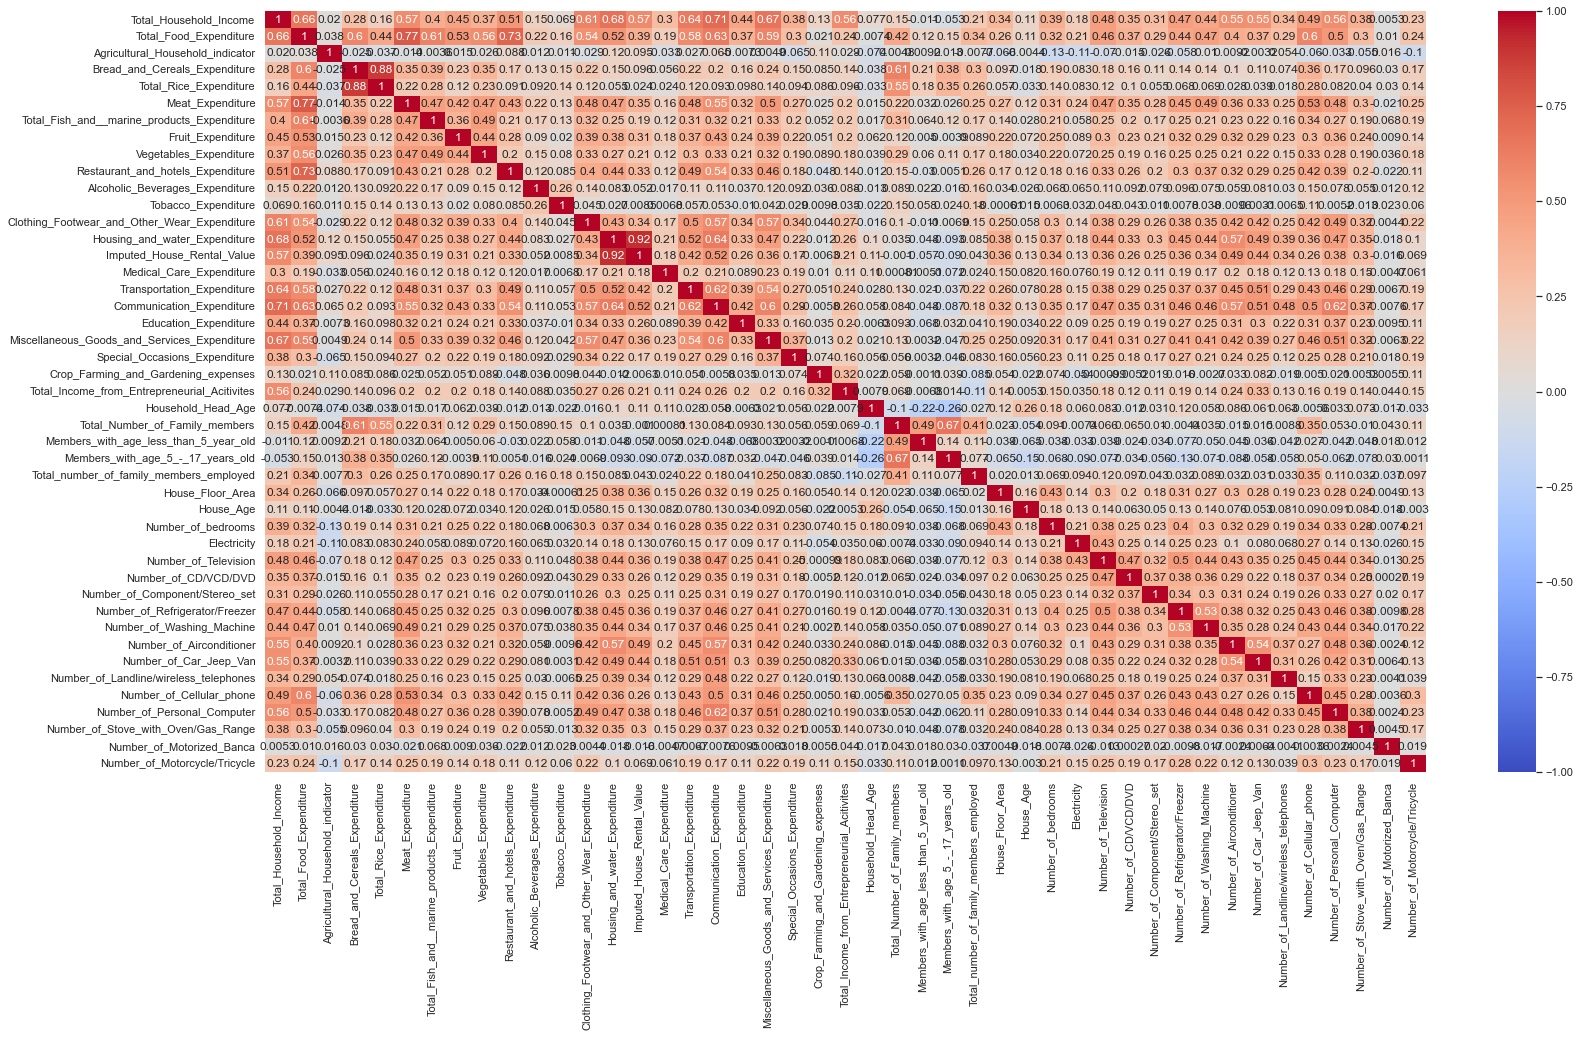

In [59]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

##### Selecionando as maiores correlações

In [60]:
income_cor = df.corr().Total_Household_Income
top_income_corr = income_cor[(income_cor < -0.5) | (income_cor > 0.5)].sort_values(ascending=False)

In [61]:
print(f'Correlações com Total_Household_Income > 0.5')
top_income_corr[1:]

Correlações com Total_Household_Income > 0.5


Communication_Expenditure                       0.710140
Housing_and_water_Expenditure                   0.676186
Miscellaneous_Goods_and_Services_Expenditure    0.666288
Total_Food_Expenditure                          0.663660
Transportation_Expenditure                      0.639939
Clothing_Footwear_and_Other_Wear_Expenditure    0.605992
Imputed_House_Rental_Value                      0.574091
Meat_Expenditure                                0.567142
Total_Income_from_Entrepreneurial_Acitivites    0.563662
Number_of_Personal_Computer                     0.557561
Number_of_Airconditioner                        0.551994
Number_of_Car_Jeep_Van                          0.546663
Restaurant_and_hotels_Expenditure               0.510017
Name: Total_Household_Income, dtype: float64

#####  Métricas descritivas das maiores correlações

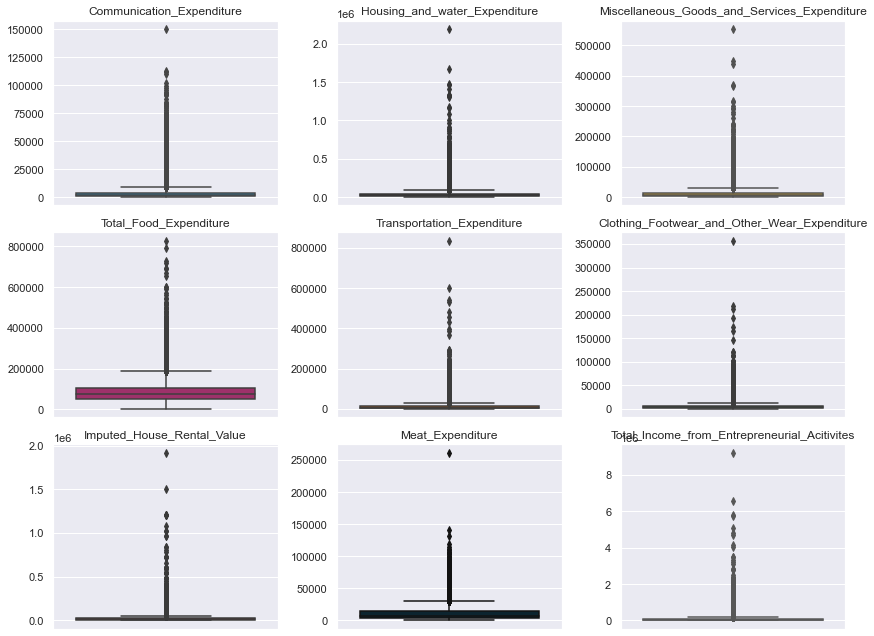

In [62]:
fig, axes = plt.subplots(3,3,figsize=(12,9))
plot_index = 1
for i in range(3):
    for j in range(3):
        plot_data = df[top_income_corr[:10].index[plot_index]]
        sns.boxplot(
            y = plot_data, 
            color=color_palette[plot_index-1],
            ax=axes[i,j])
        axes[i,j].set_ylabel('')
        axes[i,j].set_title(plot_data.name, fontsize=12)
        plot_index += 1

plt.tight_layout();

##### Retirando os outliers

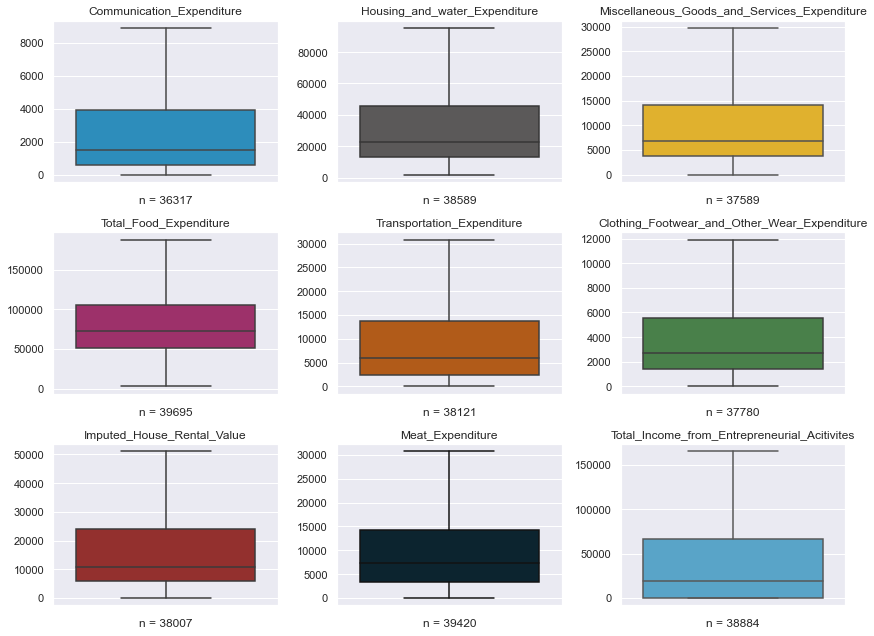

In [63]:
fig, axes = plt.subplots(3,3,figsize=(12,9))
plot_index = 1
for i in range(3):
    for j in range(3):
        plot_data = df[top_income_corr[:10].index[plot_index]]
        sns.boxplot(
            y = plot_data, 
            color=color_palette[plot_index-1],
            showfliers=False,
            ax=axes[i,j])
        axes[i,j].set_xlabel(f'n = {remove_outliers(plot_data).shape[0]}')
        axes[i,j].set_ylabel('')
        axes[i,j].set_title(plot_data.name, fontsize=12)
        plot_index += 1

plt.tight_layout();

##### Quantidade de  outliers

In [64]:
for feature in top_income_corr.index[1:]:
    print(f'{df[feature].name}: {df.shape[0] - remove_outliers(df[feature]).shape[0]} outliers')

Communication_Expenditure: 5227 outliers
Housing_and_water_Expenditure: 2955 outliers
Miscellaneous_Goods_and_Services_Expenditure: 3955 outliers
Total_Food_Expenditure: 1849 outliers
Transportation_Expenditure: 3423 outliers
Clothing_Footwear_and_Other_Wear_Expenditure: 3764 outliers
Imputed_House_Rental_Value: 3537 outliers
Meat_Expenditure: 2124 outliers
Total_Income_from_Entrepreneurial_Acitivites: 2660 outliers
Number_of_Personal_Computer: 41544 outliers
Number_of_Airconditioner: 41544 outliers
Number_of_Car_Jeep_Van: 41544 outliers
Restaurant_and_hotels_Expenditure: 3093 outliers


##### Quantidade de zeros

In [65]:
top_income_corr_df = df[top_income_corr.index]
top_income_corr_df[top_income_corr_df == 0].count()

Total_Household_Income                              0
Communication_Expenditure                        4204
Housing_and_water_Expenditure                       0
Miscellaneous_Goods_and_Services_Expenditure        6
Total_Food_Expenditure                              0
Transportation_Expenditure                        309
Clothing_Footwear_and_Other_Wear_Expenditure      521
Imputed_House_Rental_Value                       1895
Meat_Expenditure                                  346
Total_Income_from_Entrepreneurial_Acitivites    14506
Number_of_Personal_Computer                     32988
Number_of_Airconditioner                        37457
Number_of_Car_Jeep_Van                          38876
Restaurant_and_hotels_Expenditure                3792
dtype: int64

##### Relação do Income em Expenditures = 0

Vamos verificar qual é a distribuição de **Total_Household_Income** onde os gastos estão com valor 0

In [66]:
# remove features with no zeros
expenditures_df = top_income_corr_df.drop(['Housing_and_water_Expenditure', 'Total_Food_Expenditure'],axis=1)
# select only features with Expenditure
expenditures_df = expenditures_df.filter(regex='Expenditure')
# ad back Total_Household_Income
expenditures_df.insert(0, 'Total_Household_Income', top_income_corr_df.Total_Household_Income)
# reorder columns by sorted values
expenditures_df = expenditures_df[ expenditures_df[expenditures_df == 0].count().sort_values(ascending=False).index] 

In [67]:
# clean outliers from Total_Household_Income
_df = df[df.Total_Household_Income.isin(remove_outliers(df.Total_Household_Income))].copy()
# select only correlated features
_df = _df[expenditures_df.columns]

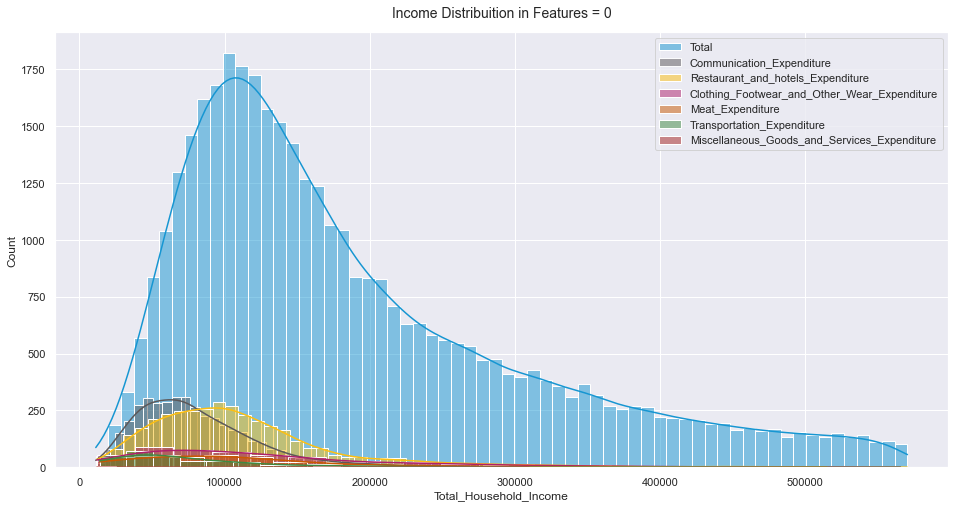

In [68]:
plt.figure(figsize=(16,8))

sns.histplot(_df.Total_Household_Income, kde=True, label='Total')
for i in range(_df.shape[1]-1):
    feature_name = _df.iloc[:,i].name
    sns.histplot(
        x = _df.query(f'{feature_name} == 0').Total_Household_Income, 
        kde=True, color=color_palette[i+1],
        label=f'{feature_name}'
    )

plt.title('Income Distribuition in Features = 0', fontsize=14, pad=15)
plt.legend();

<font size=4 color='lightgreen'>Discussão</font>

Ao analisar a relação do Income com os gastos de valor 0, percebemos que provávelmente não se trata de outliers, uma vez que a distribuição dos rendimentos acaba sendo baixa se comparado ao total, o que é esperado. Portando a features com valor 0 não serão modificadas.  

##### Verificando os dados referentes à quantidade de móveis que o indivíduo declarou

In [69]:
_df = df.filter(regex='^Number_of').copy()

In [70]:
_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_bedrooms,41544.0,1.788008,1.105664,0.0,1.0,2.0,2.0,9.0
Number_of_Television,41544.0,0.856875,0.646306,0.0,0.0,1.0,1.0,6.0
Number_of_CD/VCD/DVD,41544.0,0.435225,0.560125,0.0,0.0,0.0,1.0,5.0
Number_of_Component/Stereo_set,41544.0,0.162141,0.389108,0.0,0.0,0.0,0.0,5.0
Number_of_Refrigerator/Freezer,41544.0,0.394184,0.537025,0.0,0.0,0.0,1.0,5.0
Number_of_Washing_Machine,41544.0,0.319806,0.478482,0.0,0.0,0.0,1.0,3.0
Number_of_Airconditioner,41544.0,0.129814,0.448673,0.0,0.0,0.0,0.0,5.0
Number_of_Car_Jeep_Van,41544.0,0.081215,0.346786,0.0,0.0,0.0,0.0,5.0
Number_of_Landline/wireless_telephones,41544.0,0.060610,0.276732,0.0,0.0,0.0,0.0,4.0
Number_of_Cellular_phone,41544.0,1.905738,1.558130,0.0,1.0,2.0,3.0,10.0


In [71]:
print('Número de linhas com todos os valores nulos:',
      _df.loc[(_df==0).all(1)].shape[0]
)

Número de linhas com todos os valores nulos: 822


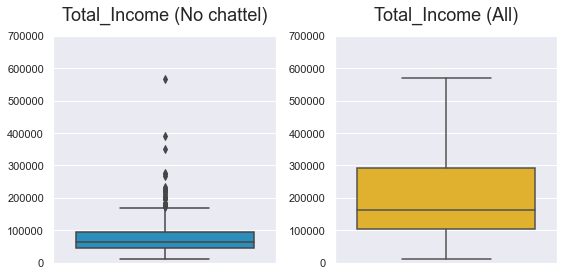

In [73]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

sns.boxplot(y=df.loc[(_df==0).all(1)]['Total_Household_Income'], ax=axes[0])
axes[0].set_title('Total_Income (No chattel)', fontsize=18, pad=15)
axes[0].set_ylim([0, 700000])
axes[0].set_ylabel('')

sns.boxplot(y=df['Total_Household_Income'], showfliers=False, color=colors['yellow'],ax=axes[1])
axes[1].set_title('Total_Income (All)', fontsize=18, pad=15)
axes[1].set_ylim([0, 700000])
axes[1].set_ylabel('')

plt.tight_layout()

In [74]:
pd.DataFrame({
    'Total_Income - No Chattel': df.loc[(_df==0).all(1)]['Total_Household_Income'].describe(),
    'Total_Income - All' : df['Total_Household_Income'].describe()
})

,Total_Income - No Chattel,Total_Income - All
count,822.000000,4.154400e+04
mean,75268.823601,2.475556e+05
std,46975.126621,2.868805e+05
min,11285.000000,1.128500e+04
25%,44780.000000,1.048950e+05
50%,65418.000000,1.640795e+05
75%,95245.500000,2.911385e+05
max,565647.000000,1.181599e+07


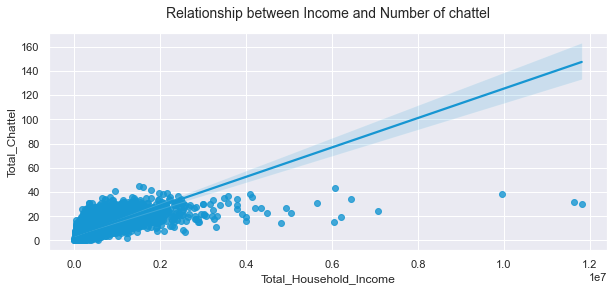

In [76]:
plt.figure(figsize=(10,4))
plt.title('Relationship between Income and Number of chattel', fontsize=14, pad=15)
sns.regplot(
    x = df.Total_Household_Income,
    y = df.filter(regex='^Number_of').sum(axis=1).rename('Total_Chattel')
);

<font size=3 color='lightgreen'>Conclusão</font>  
Observamos que a maioria da renda deste grupo de pessoas sem bens móveis está abaixo de 25% do dataset geral, mas os outliers serão levados em conta na hora de filtrar.

#### Analisando a variável da predição <span style='color:DodgerBlue'>Total__Household_Income</span>

In [77]:
df.Total_Household_Income.describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total_Household_Income, dtype: float64

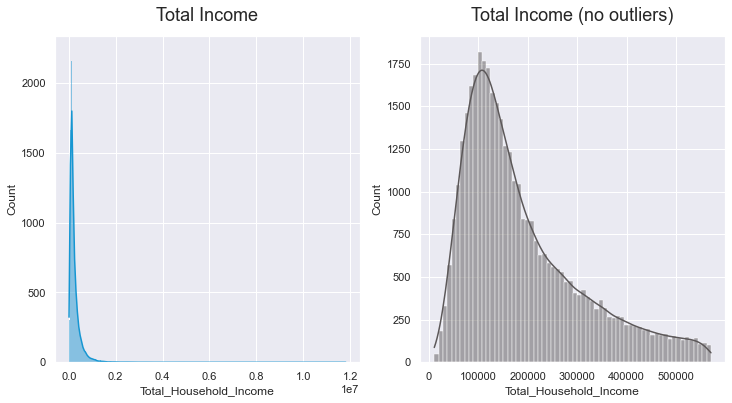

In [78]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.histplot(x=df.Total_Household_Income, 
    kde=True, color=colors['cyan'], ax=ax[0])
ax[0].set_title('Total Income', fontsize=18, pad=15)
sns.histplot(x=remove_outliers(df.Total_Household_Income), 
    kde=True, color=colors['gray'], ax=ax[1])
ax[1].set_title('Total Income (no outliers)', fontsize=18, pad=15);

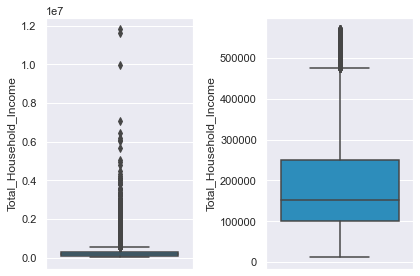

In [79]:
fig, axes = plt.subplots(1,2, figsize=(6,4))
sns.boxplot(y=df.Total_Household_Income, ax=axes[0])
sns.boxplot(y=remove_outliers(df.Total_Household_Income), ax=axes[1])
fig.tight_layout()

A variável possuei um alto range de outliers, levaremos em conta na hora de montar o modelo.

### <font color='orange'>Aplicando o Modelo de Regressão Linear</font>

#### Modelo com todos os dados

In [80]:
# selecting features to fit model
model_df  = pd.get_dummies(df)

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression model score: 82.68 %
Regression model r²score: -8675.96 %
Residuals mean: 2.817201647975391e-08
Normal distribuition test:
statistic = 77220.12; pvalue = 0.0
Absolute Mean Error: 156816.7214798935
Mean Squared Error: 6999146346350.262
Couldn't calculate Mean Squared Log Error, there are negative values on y_pred

Features with p-value > 0.05:
Number_of_Cellular_phone                                                                     0.998650
Household_Head_Occupation_Marine craft mechanics                                             0.995352
Household_Head_Occupation_Medical equipment operators                                        0.989622
Household_Head_Occupation_Sewing machine operators                                           0.987269
Household_Head_Occupation_Sales supervisors in wholesale trade                               0.986953
                                                                                               ...   
Household_Head_Occupation_Pawnbr

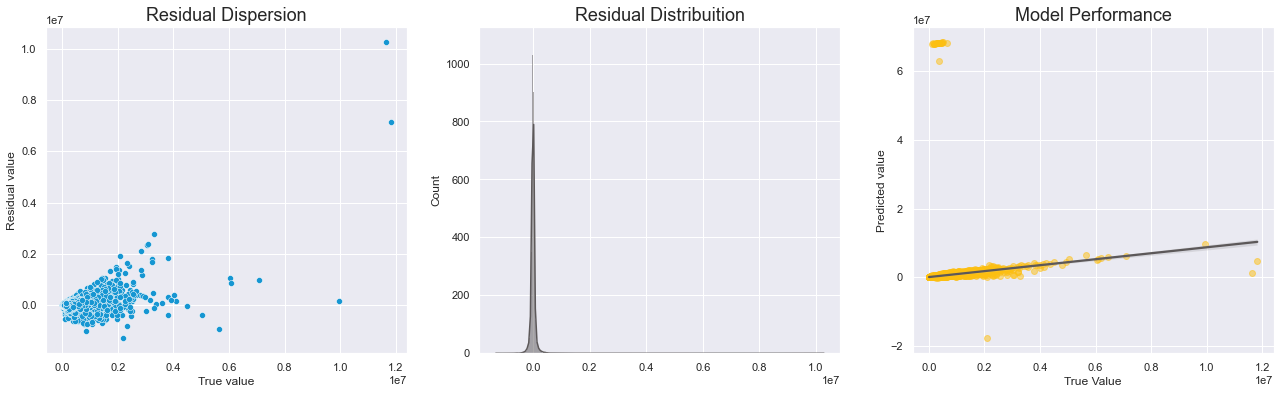

In [85]:
# Create model and display summary
model = create_model(
    df = model_df,
    target = 'Total_Household_Income',
    log = True, # display summary information
    plot = True # visualize residuals distribuition and model performance
)

<font size=4 color='lightgreen'>Discussão</font>

O modelo feito com todos os dados não gerou um bom resultado. Os resíduos estão concentrados e claramente temos diversos outliers em nossos dados. Será necessário uma análise mais detalhada caso for usar os dados categóricos, e também buscar reduzir a dimensionalidade.  
Antes disso iremos fazer outro modelo com apenas dados quantitativos.

#### Modelo com dados quantitativos

In [86]:
# selecting features to fit model
model_df2  = df.select_dtypes(include=['int64','float64']).copy()

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression model score: 81.16 %
Regression model r²score: 86.37 %
Residuals mean: 2.94430081782532e-10
Normal distribuition test:
statistic = 74561.23; pvalue = 0.0
Absolute Mean Error: 52820.80074443958
Mean Squared Error: 10871097701.415358
Mean Squared Log Error: 0.0872357033080716

Features with p-value > 0.05:
Fruit_Expenditure                    0.808325
Number_of_Cellular_phone             0.581613
Meat_Expenditure                     0.459774
Number_of_Washing_Machine            0.366795
Bread_and_Cereals_Expenditure        0.244030
Number_of_Component/Stereo_set       0.237062
Number_of_Motorized_Banca            0.209151
Number_of_CD/VCD/DVD                 0.187535
House_Age                            0.186026
Total_Rice_Expenditure               0.161847
Tobacco_Expenditure                  0.155913
Electricity                          0.139543
Alcoholic_Beverages_Expenditure      0.138268
Number_of_Refrigerator/Freezer       0.133879
Members_with_age_5_-_17_years_old    0.

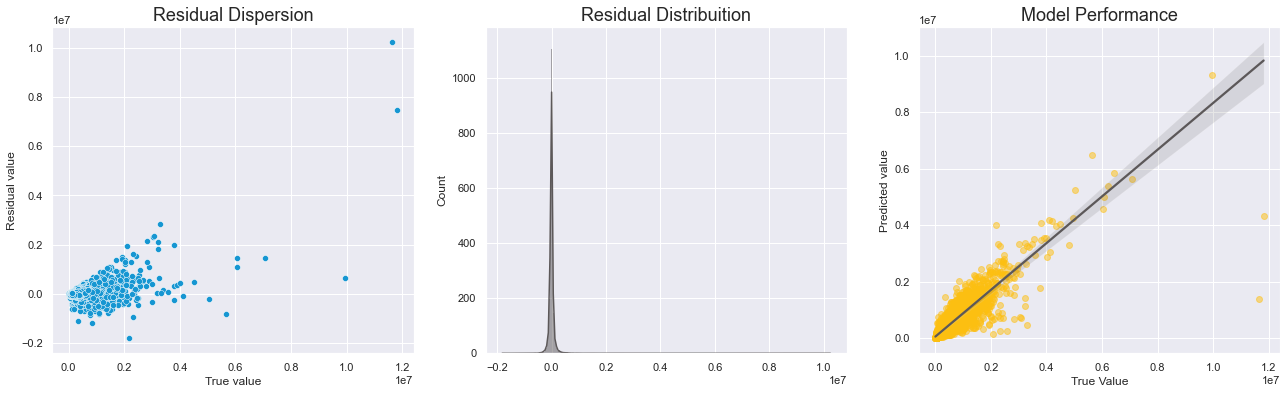

In [87]:
# Create model and display summary
model2 = create_model(
    df = model_df2,
    target = 'Total_Household_Income',
    log = True, # display summary information
    plot = True # visualize residuals distribuition and model performance
)

<font size=4 color='lightgreen'>Discussão</font>

O resultado deste modelo também não está satisfatório, apesar do score ter melhorado, a distribuição de nossos **resíduos ainda não está dispersa**. Provávelmente são os outliers que estão influenciando, então iremos removê-los.

#### Modelo com dados quantitativos sem outliers

Incialmente iremos remover apenas os outliers da variável de predição **Total_Household_Income**

In [88]:
df_clean = remove_outliers_df(df = df, columns = 'Total_Household_Income')

print(f'Tamanho do dataframe original: {df.shape}')
print(f'Tamanho do dataframe após remoção de outliers: {df_clean.shape}, -{round((df.shape[0] - df_clean.shape[0])/df.shape[0]*100,2)}% dos dados')

Tamanho do dataframe original: (41544, 60)
Tamanho do dataframe após remoção de outliers: (38393, 60), -7.58% dos dados


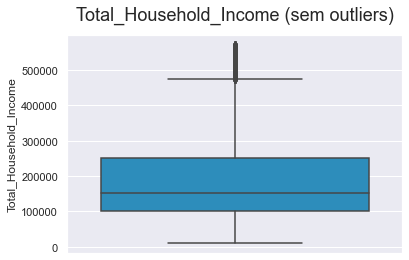

In [89]:
sns.boxplot(y = df_clean.Total_Household_Income)
plt.title('Total_Household_Income (sem outliers)', fontsize=18, pad=15);

In [90]:
# selecting features to fit model
model_df3  = df_clean.select_dtypes(include=['int64','float64']).copy()

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression model score: 82.8 %
Regression model r²score: 81.77 %
Residuals mean: 6.309277269729348e-11
Normal distribuition test:
statistic = 5812.66; pvalue = 0.0
Absolute Mean Error: 33728.12053707682
Mean Squared Error: 2646443537.4583764
Mean Squared Log Error: 0.05890600060456136

Features with p-value > 0.05:
House_Age                                      0.982302
Restaurant_and_hotels_Expenditure              0.826006
Number_of_Component/Stereo_set                 0.759165
Total_Rice_Expenditure                         0.734398
Members_with_age_less_than_5_year_old          0.724354
Total_Number_of_Family_members                 0.624717
Number_of_Airconditioner                       0.411311
Electricity                                    0.376239
Number_of_CD/VCD/DVD                           0.317904
const                                          0.313099
Fruit_Expenditure                              0.306156
Total_Fish_and__marine_products_Expenditure    0.305634
Number_of_M

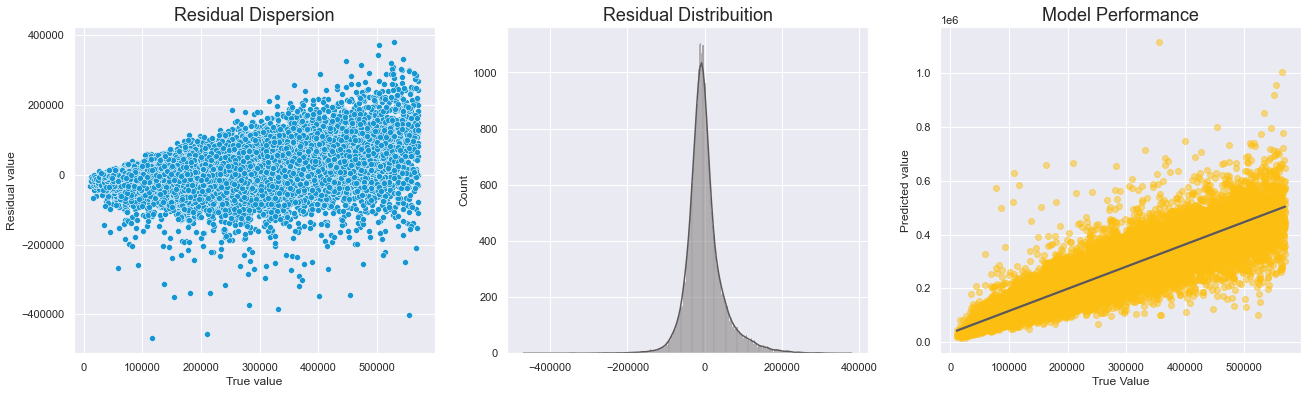

In [91]:
# Create model and display summary
model3 = create_model(
    df = model_df3,
    target = 'Total_Household_Income',
    log = True, # display summary information
    plot = True # visualize residuals distribuition and model performance
)

<font size=4 color='lightgreen'>Discussão</font>

Remover os outliers acabou piorando a performance do modelo, e os valores dos resíduos continuam seguindo uma tendência.  

Também observamos que ao retirar outros outliers resultou em uma grande perda das amostras, portanto iremos buscar uma abordagem de tranformação dos dados.

In [92]:
_df = remove_outliers_df(df = df, columns = df.filter(regex='Income|Expenditure').select_dtypes(include=['int64','float64']).columns)
print(f'Tamanho original: {df.shape}')
print(f'Tamanho após remoção dos outliers de Income e Expenditure:\n\
    {_df.shape}, -{round((df.shape[0] - _df.shape[0])/df.shape[0]*100,2)}% dos dados')

_df = remove_outliers_df(df = df, columns = df[top_income_corr.filter(regex='Income|Expenditure').index])
print(f'Tamanho original: {df.shape}')
print(f'Tamanho após remoção dos outliers das features mais correlacionadas:\n\
    {_df.shape}, -{round((df.shape[0] - _df.shape[0])/df.shape[0]*100,2)}% dos dados')

Tamanho original: (41544, 60)
Tamanho após remoção dos outliers de Income e Expenditure:
    (11383, 60), -72.6% dos dados
Tamanho original: (41544, 60)
Tamanho após remoção dos outliers das features mais correlacionadas:
    (22545, 60), -45.73% dos dados


#### Modelo com Transformação Log

A transformação em log será feita nos dados quantitativos de Income e gastos Expenditures no geral.
Para aplicar o log, devemos remover os valores com 0 nas features de interesse. Entretando isso irá diminuir muito o tamanho da nossa amostra, e portando vamos acabar estimando um valor, baseado na porcentagem média para cada gasto.

In [93]:
# selecting features to fit model
columns_to_transform = df.select_dtypes(include=['int64']).filter(regex='Income|Expenditure').columns

# calculate average expent for every expenditure
expenditure_percent = pd.Series(dtype='float64')
for column in columns_to_transform:
    subset = df.query(f'{column} != 0')
    percent = (subset[column] / subset.Total_Household_Income).mean()
    expenditure_percent[column] = round(percent,2)
expenditure_percent[1:]

Total_Food_Expenditure                          0.45
Bread_and_Cereals_Expenditure                   0.16
Total_Rice_Expenditure                          0.12
Meat_Expenditure                                0.05
Total_Fish_and__marine_products_Expenditure     0.06
Fruit_Expenditure                               0.01
Vegetables_Expenditure                          0.03
Restaurant_and_hotels_Expenditure               0.07
Alcoholic_Beverages_Expenditure                 0.01
Tobacco_Expenditure                             0.03
Clothing_Footwear_and_Other_Wear_Expenditure    0.02
Housing_and_water_Expenditure                   0.16
Medical_Care_Expenditure                        0.03
Transportation_Expenditure                      0.05
Communication_Expenditure                       0.01
Education_Expenditure                           0.03
Miscellaneous_Goods_and_Services_Expenditure    0.05
Special_Occasions_Expenditure                   0.03
Total_Income_from_Entrepreneurial_Acitivites  

In [94]:
df_to_transform = df.select_dtypes(include=['int64']).copy()
# For every value = 0, fill with Total_Income * Average Expenditure percent
for expenditure in expenditure_percent[1:].index:
    df_to_transform[expenditure] = df_to_transform[['Total_Household_Income', expenditure]].\
        apply(
            lambda row: row['Total_Household_Income'] * expenditure_percent[expenditure] if row[expenditure]==0 else row[expenditure],
            axis=1
        )
# Check for zeros
(df_to_transform[columns_to_transform] == 0).sum().sum()

0

In [95]:
# transform desired columns in log
df_log = df_to_transform.copy()
df_log[columns_to_transform] = np.log(df_to_transform[columns_to_transform])

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression model score: 89.26 %
Regression model r²score: 89.1 %
Residuals mean: -7.189596617883313e-14
Normal distribuition test:
statistic = 3682.54; pvalue = 0.0
Absolute Mean Error: 0.1942964705622626
Mean Squared Error: 0.06589444044546186
Mean Squared Log Error: 0.00037872621354073633

Features with p-value > 0.05:
Number_of_Cellular_phone                       0.884161
Electricity                                    0.739590
Total_Fish_and__marine_products_Expenditure    0.585886
Number_of_Television                           0.579455
Number_of_CD/VCD/DVD                           0.572960
Number_of_Component/Stereo_set                 0.270339
Number_of_Landline/wireless_telephones         0.211255
Bread_and_Cereals_Expenditure                  0.132650
Number_of_Airconditioner                       0.080134
dtype: float64


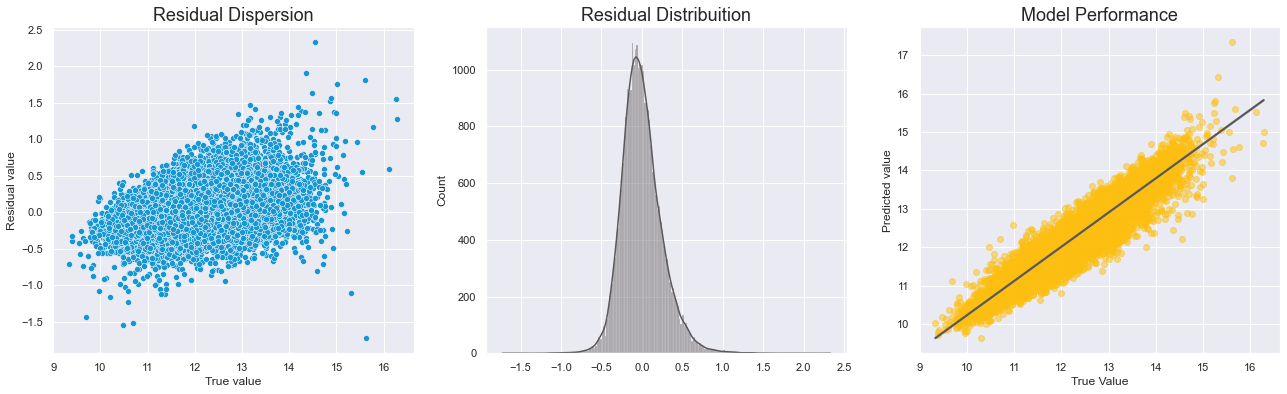

In [96]:
# Create model and display summary
model4 = create_model(
    df = df_log,
    target = 'Total_Household_Income',
    log = True, # display summary information
    plot = True # visualize residuals distribuition and model performance
)

<font size=4 color='lightgreen'>Discussão</font>

Apesar dos resíduos continuarem com uma certa tendência, o score r² teve um aumento